In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [61]:
web17=requests.get('https://www2.2019seagames.com/countries/')
data17=BeautifulSoup(web17.content,'html.parser')

In [62]:
seag17=[]
for i in data17.findAll('em'):
    seag17.append(i.string)
seag17=seag17[0:int(len(seag17)/2)]
print(seag17)

['BRUNEI DARUSALLAM', 'Total: 14', 'Gold: 0', 'Silver: 5', 'Bronze: 9', 'First Joined: 1977', 'CAMBODIA', 'Total: 17', 'Gold: 3', 'Silver: 2', 'Bronze: 12', 'First Joined: 1961', 'INDONESIA', 'Total: 191', 'Gold: 38', 'Silver: 63', 'Bronze: 90', 'First Joined: 1977', 'LAO PEOPLE’S DEMOCRATIC REPUBLIC', 'Total: 26', 'Gold: 2', 'Silver: 3', 'Bronze: 21', 'First Joined: 1959', 'MALAYSIA', 'Total: 323', 'Gold: 145', 'Silver: 92', 'Bronze: 86', 'First Joined: 1959', 'MYANMAR', 'Total: 37', 'Gold: 7', 'Silver: 10', 'Bronze: 20', 'First Joined: 1959', 'PHILIPPINES', 'Total: 121', 'Gold: 24', 'Silver: 33', 'Bronze: 64', 'First Joined: 1977', 'SINGAPORE', 'Total: 188', 'Gold: 57', 'Silver: 58', 'Bronze: 73', 'First Joined: 1959', 'THAILAND', 'Total: 246', 'Gold: 72', 'Silver: 86', 'Bronze: 88', 'First Joined: 1959', 'TIMOR LESTE', 'Total: 3', 'Gold: 0', 'Silver: 0', 'Bronze: 3', 'First Joined:\xa02003', 'VIETNAM', 'Total: 168', 'Gold: 58', 'Silver: 50', 'Bronze: 60', 'First Joined: 1959']


In [167]:
negara=[]
for i in range(0,len(seag17),6):
    negara.append(seag17[i])
negara[0]='BRUNEI'
negara[3]='LAO PDR'
negara[9]='TIMOR-LESTE'
print(negara)

['BRUNEI', 'CAMBODIA', 'INDONESIA', 'LAO PDR', 'MALAYSIA', 'MYANMAR', 'PHILIPPINES', 'SINGAPORE', 'THAILAND', 'TIMOR-LESTE', 'VIETNAM']


In [168]:
gold17=[]
for i in range(2,len(seag17),6):
    gold=int(seag17[i].replace('Gold: ',''))
    gold17.append(gold)
print(gold17)

[0, 3, 38, 2, 145, 7, 24, 57, 72, 0, 58]


In [169]:
df19=pd.read_html('https://rs.2019seagames.com/RS2019/mobiapp/MedalTally')
df19=df19[0].sort_values(by='Contingent')

gold19=df19['Gold'].to_list()
print(gold19)

[2, 4, 72, 1, 55, 4, 149, 53, 92, 0, 98]


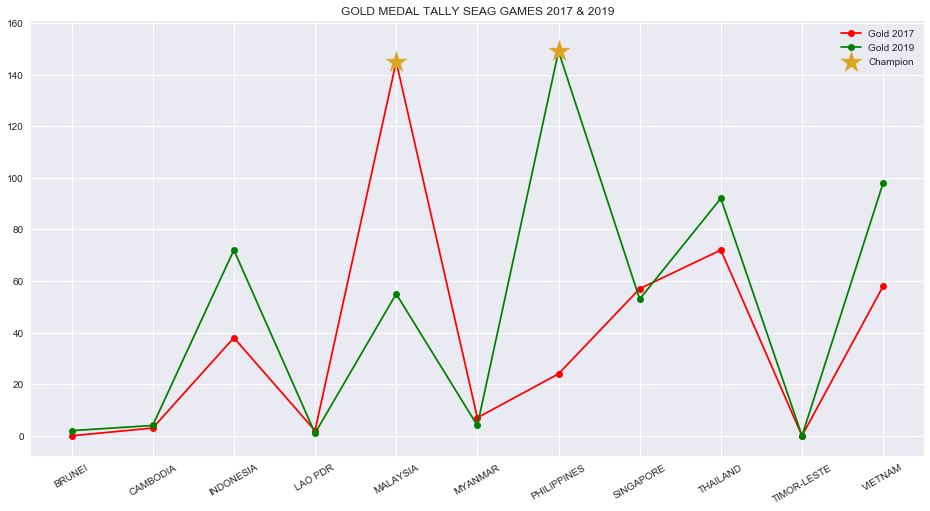

In [171]:
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
plt.plot(negara,gold17,'ro-',label='Gold 2017')
plt.plot(negara,gold19,'go-',label='Gold 2019')
plt.scatter(
    [gold17.index(max(gold17)),gold19.index(max(gold19))],
    [max(gold17),max(gold19)],
    marker='*',color='goldenrod',s=500,zorder=4,label='Champion')
plt.title('GOLD MEDAL TALLY SEAG GAMES 2017 & 2019')
plt.legend()
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

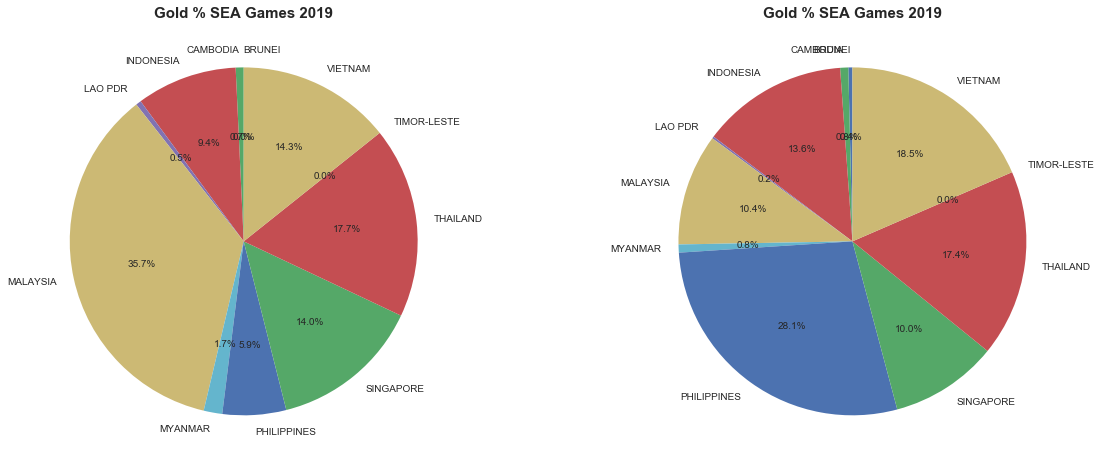

In [178]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(gold17,labels=negara,autopct='%1.1f%%',startangle=90)
plt.title('Gold % SEA Games 2019',size=15,fontweight='bold')

plt.subplot(122)
plt.pie(gold19,labels=negara,autopct='%1.1f%%',startangle=90)
plt.title('Gold % SEA Games 2019',size=15,fontweight='bold')

plt.show()